<a href="https://colab.research.google.com/github/gizemkaratas/RFM-Analizi-ile-Musteri-Segmentasyonu/blob/main/RFM_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2010-2011") #excelde birden fazla sayfa varsa okunmasını istediğiniz sayfanın adını ayrıca girmelisiniz

# **Veri Önişleme**

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Not: invoce_no: fatura no çokluyot çünkü her alışverişte birden fazla ürün alınmış olabilir
customer_id= ç-mğşteri no çokluyor hem birden fazla alışveriş yapılmış hem de fatura no çokladıkça o da çokluyor. price brim fiyat, quantity satın alınan adet.


In [4]:
df.shape

(541910, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


İadelerden dolayı  sapmalar yaşanmış (C ile başlayanlar iade)

In [7]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


not: müşteri bazlı sınıflandırma yapacaksak bunun için customerid ihtiyaç var boş olanları tolere edemeyiz silmeyi tercih edeceğiz


In [8]:
#kaç farklı ürün var
df["Description"].nunique()

4223

In [9]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head() #ürünlerden kaç adet satılmış

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [10]:
df["Invoice"].nunique() #kaç adet fatura kesilmiş

25900

In [11]:
df["Customer ID"].nunique() #kaç adet müşteri var

4372

In [12]:
df["TotalPrice"]=df["Quantity"]*df["Price"] #kalem başı toplam fiyat

In [13]:
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head() #her faturada harcanan para


,TotalPrice
Invoice,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [14]:
df.dropna(inplace=True) #boş değerleri sildik


!!!!! İADELERİ VERİ SETİNDEN ÇIKARMALIYIP tekrar veri yi incdeleyelim

In [15]:
df[df["Invoice"].str.contains("C", na=False)] #invoce no başında C  olanlar iade edilenler adet ve toplam ücrete bakıldığında - gözükmektedir


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [17]:
df=df[~df["Invoice"].str.contains("C", na=False)]  #içinde c olanları çıkarıp dfye ekle yeni df c içermeyenlerden oluşsun

# **RFM Metrikleri Hesaplama**

*   R: Recency yenilik, en son alışveriş yaptığı zaman aralığı
*   F:  Sıklık,frekans, işlem sıklığı kaç kez alışveriş yaptığı
*   M: Monetary: Parasal değer, müşterinin kaç brm parasal değer kattığı



In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
df["InvoiceDate"].max() #en son ne zaman alışveriş yapılmış
#analiz tarihi belirleme , veri eski olduğu için son alışveriş tarihinden 2 gün sonra yapılmış gibi düşünelim
today_date=dt.datetime(2011,12,10)


In [20]:
# r = müşterilerin idleri tekilleştirip analiz tarihinden müşterinin en son alışveriş yaptığı atarihi çıkar
#f = müşteriyi tekilleştirip farklı olan invoce numaralarını saydır
#m müşteriyi tekilleştirip total priceları  topla
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
rfm.head()



,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [21]:
rfm.columns = ['recency', 'frequency', 'monetary'] #kolon isimlerini r f m metrik isimleriyle değiştirdik
rfm.head()

rfm.describe().T



,count,mean,std,min,25%,50%,75%,max
recency,4339.0,92.041484,100.007757,0.0,17.000,50.00,141.50,373.00
frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.00,210.00
monetary,4339.0,2053.797166,8988.247836,0.0,307.245,674.45,1661.64,280206.02


In [22]:
rfm = rfm[rfm["monetary"] > 0] #monetary 0 olamaz bunları sildik
rfm.shape

(4338, 3)

# **RFM Skorlarının Hesaplanması**

1.   1-5 e kadar skorlandıracağız
2.   r nin küçük olması f ve m nin büyük olması iyidir



In [23]:
# recencynin skorlanması: qcut ile büyükten küçüğe sırayıp 5 eşit parçaya bölünecek
# recencynin küçük olması yani yeni alışveriş yapmış olması iyi bir durum olduğu için en küçük olan ilk parçaya 5 puan vererek başlıyoruz
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

# 0-100, 0-20, 20-40, 40-60, 60-80, 80-100

In [24]:
#frequency skorlanması: frekansın yüksek olması iyi bir durum olduğu için değerleri büyükten küçüğe sıraladıktan sonra
#5 eşit parçaya bölüp en büyük parçaya 5 olacak şekilde skorluyoeuz
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]) #rank firs ilk gördüğüne ilk labelı ver, frekans aralığı benzer olduğu için hata vermesin diye ekledüim

In [25]:
#monetary değerinin skorlanması monetary arttıkça skoru artmalı ne kadar büyükse o kadar iyi frequencyle aynı işlem yapılacak
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [26]:
#RFM score için RF matrisi ile segmente edebilmek için r ve f scoreları ilk önce strye çevirip
#string ifade şeklinde birleştirerek yeni bir değişkende ayrı bir sütuna yazdırdık
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [28]:
rfm[rfm["RFM_SCORE"] == "55"]

rfm[rfm["RFM_SCORE"] == "11"]

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.0,325,1,77183.6,1,1,5,11
12350.0,310,1,334.4,1,1,2,11
12353.0,204,1,89.0,1,1,1,11
12354.0,232,1,1079.4,1,1,4,11
12355.0,214,1,459.4,1,1,2,11
...,...,...,...,...,...,...,...
15717.0,234,1,150.3,1,1,1,11
15723.0,364,1,203.1,1,1,1,11
15729.0,212,1,85.0,1,1,1,11


# **RFM Segmentlerinin Oluşturulması**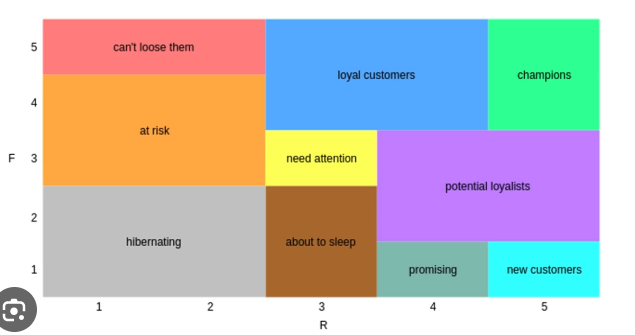

In [34]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}  #yukarıdaki grafiği koda döktük hangi değer neye dek geliyorsa yazdık

In [35]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True) # rfme segment ekledik bunu da RFM Skoruna
#bakıp segment haritası sözlüğüne bakıp ile atayarak yaptık örn 41 görürsen nuna promising ata gibi

In [36]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"]) # bu segmentlerin r f m ort toplamları incelenebilir

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep        52.312500   352   1.161932   352   471.994375   352
at_Risk              152.785835   593   2.878583   593  1084.535297   593
cant_loose           131.968254    63   8.380952    63  2796.155873    63
champions              5.361769   633  12.417062   633  6857.963918   633
hibernating          216.605042  1071   1.101774  1071   488.643307  1071
loyal_customers       32.608059   819   6.479853   819  2864.247791   819
need_attention        51.427807   187   2.326203   187   897.627861   187
new_customers          6.428571    42   1.000000    42   388.212857    42
potential_loyalists   16.398760   484   2.010331   484  1041.222004   484
promising             22.510638    94   1.000000    94   294.007979    94

In [33]:
rfm.to_csv("rfm.csv") #oluşturduğumuz segmentasyonu csv ya da excele çevirip bu kişiler için gereken işlemlerin yapılması için satış kapmanya ekibine verilebilir